In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from funcs_plotter import double_roc, single_roc, getDataset

In [10]:
df1 = getDataset(outputPath='output/', classical=False, trainSize=1000)
df2 = getDataset(outputPath='output/', classical=True, trainSize=1000)

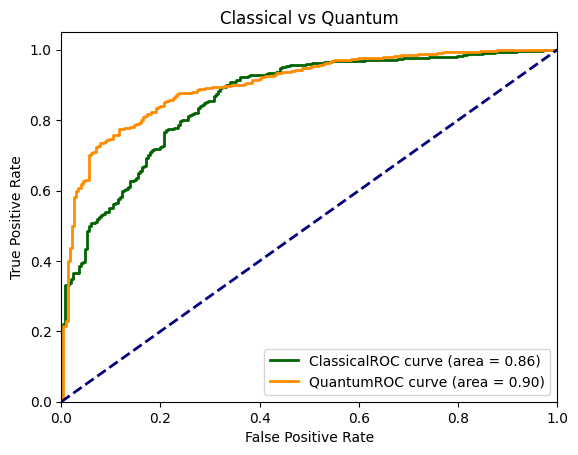

In [11]:
double_roc(df2, 'Classical', df1, 'Quantum')

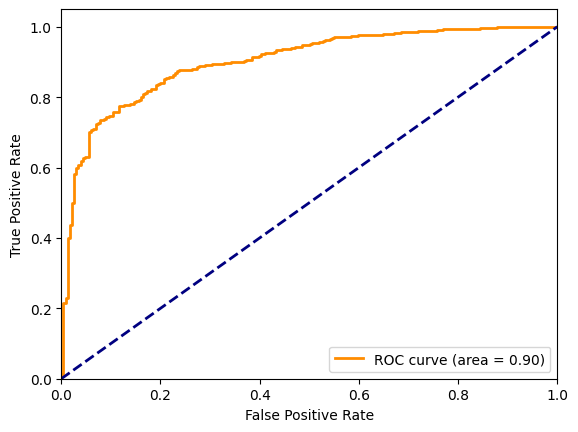

In [13]:
single_roc(df1,'')